## Regresion logistica para predicciones bancarias

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../python-ml-course/datasets/bank/bank.csv", sep=";")

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [4]:
data.shape

(4119, 21)

In [5]:
data.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

In [6]:
data["y"] =(data["y"]== 'yes').astype(int)

In [7]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


In [8]:
data["education"].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [9]:
data["education"]= np.where(data["education"]=="basic.4y","Basic",data["education"])
data["education"]= np.where(data["education"]=="basic.6y","Basic",data["education"])
data["education"]= np.where(data["education"]=="basic.9y","Basic",data["education"])

data["education"]= np.where(data["education"]=="high.school","High School",data["education"])
data["education"]= np.where(data["education"]=="professional.course","Professional Course",data["education"])
data["education"]= np.where(data["education"]=="university.degree","University Degree",data["education"])

data["education"]= np.where(data["education"]=="illiterate","Illiterate",data["education"])
data["education"]= np.where(data["education"]=="unknow","Unknow",data["education"])



In [10]:
data["education"].unique()

array(['Basic', 'High School', 'University Degree', 'Professional Course',
       'unknown', 'Illiterate'], dtype=object)

In [11]:
data["y"].value_counts()

0    3668
1     451
Name: y, dtype: int64

In [12]:
data.groupby("y").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


In [13]:
data.groupby("education").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
Basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144,0.079610
High School,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
Illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
Professional Course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
University Degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689


Text(0.5, 1.0, 'Frecuencia de compra en funcion del nivel de educacion')

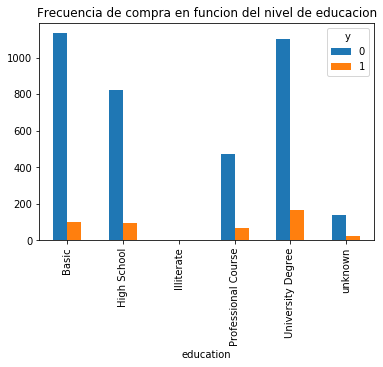

In [14]:
%matplotlib inline 
pd.crosstab(data.education, data.y).plot(kind="bar")
plt.title('Frecuencia de compra en funcion del nivel de educacion')

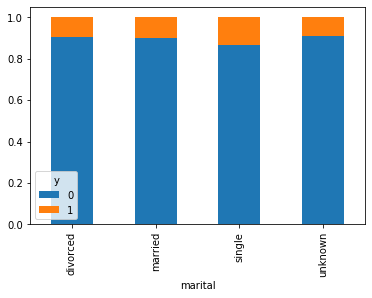

In [15]:
table= pd.crosstab(data.marital, data.y)
table.div(table.sum(1).astype(float), axis =0).plot(kind="bar",stacked=True)


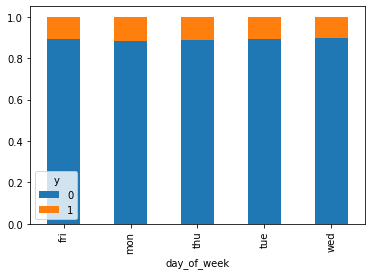

In [16]:
%matplotlib inline
table =pd.crosstab(data.day_of_week, data.y)
table.div(table.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)

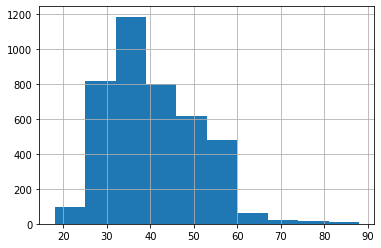

In [17]:
%matplotlib inline
data.age.hist()

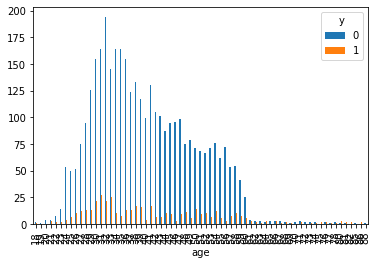

In [18]:
pd.crosstab(data.age, data.y).plot(kind="bar")

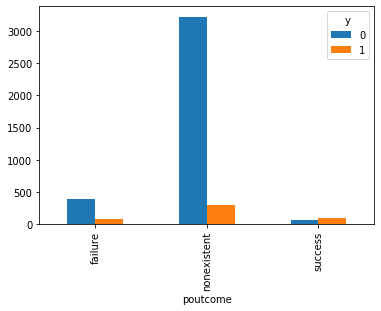

In [19]:
pd.crosstab(data.poutcome , data.y).plot(kind="bar")

In [20]:
#Conversion de las variables cateoricas a dummies

In [21]:
categories = ["job", "marital", "education", "housing", "loan", "contact", 
              "month", "day_of_week", "poutcome"]
for category in categories:
    cat_list = "cat"+ "_"+category
    cat_dummies = pd.get_dummies(data[category], prefix=category)
    data_new = data.join(cat_dummies)
    data = data_new

In [22]:
data_vars = data.columns.values.tolist()

In [23]:
default_delete = ["default"]

In [43]:
to_keep = [v for v in data_vars if v not in categories]
to_keep = [v for v in to_keep if v not in ["default"]]

In [44]:
bank_data = data[to_keep]

In [45]:
bank_data.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_High School',
       'education_Illiterate', 'education_Professional Course',
       'education_University Degree', 'education_unknown', 'housing_no',
       'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown',
       'loan_yes', 'contact_cellular', 'contact_telephone', 'month_apr',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'd

In [46]:
bank_data_vars = bank_data.columns.values.tolist()
Y = ["y"]
X = [ v for v in bank_data_vars if v not in Y ]


## Seleccion de rasgos para el modelo

In [47]:
n = 12 

In [48]:
from sklearn import datasets 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [49]:
lr = LogisticRegression()

In [50]:
rfe = RFE(lr, n)
rfe = rfe.fit(bank_data[X], bank_data[Y].values.ravel())

C:\Users\Tomas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tomas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tomas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tomas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tomas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linea

C:\Users\Tomas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tomas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tomas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tomas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tomas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linea

In [51]:
bank_data

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,...,0,0,1,0,0,0,0,0,1,0
1,39,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0,...,0,0,1,0,0,0,0,0,1,0
2,25,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1,...,0,0,0,0,0,0,1,0,1,0
3,38,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1,...,0,0,1,0,0,0,0,0,1,0
4,47,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,53,1,999,0,1.4,93.918,-42.7,4.958,5228.1,...,0,0,0,0,1,0,0,0,1,0
4115,39,219,1,999,0,1.4,93.918,-42.7,4.959,5228.1,...,0,0,1,0,0,0,0,0,1,0
4116,27,64,2,999,1,-1.8,92.893,-46.2,1.354,5099.1,...,0,0,0,1,0,0,0,1,0,0
4117,58,528,1,999,0,1.4,93.444,-36.1,4.966,5228.1,...,0,0,1,0,0,0,0,0,1,0


In [52]:
print(rfe.ranking_)

[34 41 18 42  1 14 27 25  1 38 22  3  1 35  2 36  1  5 30 33 12 45 19 40
 31 47 26 13 46 21 32  8 20  6 10 15  9 23 16  4 43 24  1  1  1  1  1 17
  1 44 37 28 39 29 11  1  7  1]


In [53]:
z=zip(bank_data_vars,rfe.support_, rfe.ranking_)

In [54]:
list(z)

[('age', False, 34),
 ('duration', False, 41),
 ('campaign', False, 18),
 ('pdays', False, 42),
 ('previous', True, 1),
 ('emp.var.rate', False, 14),
 ('cons.price.idx', False, 27),
 ('cons.conf.idx', False, 25),
 ('euribor3m', True, 1),
 ('nr.employed', False, 38),
 ('y', False, 22),
 ('job_admin.', False, 3),
 ('job_blue-collar', True, 1),
 ('job_entrepreneur', False, 35),
 ('job_housemaid', False, 2),
 ('job_management', False, 36),
 ('job_retired', True, 1),
 ('job_self-employed', False, 5),
 ('job_services', False, 30),
 ('job_student', False, 33),
 ('job_technician', False, 12),
 ('job_unemployed', False, 45),
 ('job_unknown', False, 19),
 ('marital_divorced', False, 40),
 ('marital_married', False, 31),
 ('marital_single', False, 47),
 ('marital_unknown', False, 26),
 ('education_Basic', False, 13),
 ('education_High School', False, 46),
 ('education_Illiterate', False, 21),
 ('education_Professional Course', False, 32),
 ('education_University Degree', False, 8),
 ('education_u

In [55]:
cols = ["previous", "euribor3m", "job_blue-collar", "job_retired", "month_aug", "month_dec", 
        "month_jul", "month_jun", "month_mar", "month_nov", "day_of_week_wed", "poutcome_nonexistent"]

In [56]:
X = bank_data[cols]
Y = bank_data["y"]

implemtnacion del modelo en python con statsmodel.api

In [57]:
import statsmodels.api as sm

In [63]:
logit_model = sm.Logit( Y ,X )

In [64]:
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.291770
         Iterations 7


In [65]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:                Logit             Pseudo R-squared:  0.155     
Dependent Variable:   y                 AIC:               2427.6025 
Date:                 2020-04-24 19:03  BIC:               2503.4828 
No. Observations:     4119              Log-Likelihood:    -1201.8   
Df Model:             11                LL-Null:           -1422.9   
Df Residuals:         4107              LLR p-value:       6.4492e-88
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       7.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
previous             -0.1229   0.0700  -1.7545 0.0793 -0.2601  0.0144
euribor3m            -0.6049   0.0383 -15.7882 0.0000 -0.6800 -0.5298
job_blue-collar      -0.5032   0.1519  -3.3136 0.0009 -0.8009 -0.2056
job_retired           0.2235   0.2191   1.0205 0.3075 -0.2058  0.6529
month_aug             0.6048   0.1759   3.4374 0.0006  0.2600  0.9497
month_dec             1.1358   0.4493   2.5281 0.0115  0.2552  2.0163
month_jul             1.0327   0.1910   5.4071 0.0000  0.6584  1.4070
month_jun             1.0775   0.1752   6.1493 0.0000  0.7341  1.4210
month_mar             1.6448   0.3139   5.2407 0.0000  1.0297  2.2600
month_nov             0.3828   0.1950   1.9634 0.0496  0.0007  0.7649
day_of_week_wed      -0.0649   0.1391  -0.4665 0.6409 -0.3375  0.2077
poutcome_nonexistent -0.7753   0.1221  -6.3492 0.0000 -1.0147 -0.5360
=====================================================================

"""

IMPLEMENTACION DEL MODELO DE PYTHON CON SCIKIT=LEARN

In [66]:
from sklearn import linear_model

In [69]:
logit_model = linear_model.LogisticRegression()
logit_model.fit(X,Y)

C:\Users\Tomas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

C:\Users\Tomas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [70]:
logit_model.score(X,Y)

0.8963340616654528

In [73]:
1-Y.mean()

0.8905074047098811

In [86]:
pd.DataFrame(list(zip(X.columns, np.transpose(logit_ model.coef_))))

SyntaxError: invalid syntax (<ipython-input-86-c67211ffc995>, line 1)

In [87]:
pd.DataFrame(list(zip(X.columns, np.transpose(logit_model.coef_))))

,0,1
0,previous,[0.5076571353702829]
1,euribor3m,[-0.546496133920961]
2,job_blue-collar,[-0.3591553622507818]
3,job_retired,[0.35603838876396016]
4,month_aug,[0.6253983085949565]
5,month_dec,[1.1822172985978154]
6,month_jul,[0.9622633626968825]
7,month_jun,[1.0543179248209773]
8,month_mar,[1.6306366297798072]
9,month_nov,[0.45195768179106927]


In [127]:
inicial = 5000000
for n in range (0, 30):
    if inicial==5000000:
        inicial = 5000000* 1.05
        print(inicial)

    else:
        inicial = inicial*1.05
        print(inicial)

    
    
       

5250000.0
5512500.0
5788125.0
6077531.25
6381407.8125
6700478.203125
7035502.11328125
7387277.218945313
7756641.0798925795
8144473.133887209
8551696.79058157
8979281.630110648
9428245.71161618
9899657.997196991
10394640.89705684
10914372.941909682
11460091.589005167
12033096.168455426
12634750.976878198
13266488.525722109
13929812.952008216
14626303.599608626
15357618.779589059
16125499.718568513
16931774.70449694
17778363.439721785
18667281.611707877
19600645.69229327
20580677.976907935
21609711.875753332


In [104]:
ganancia


250000.0

In [132]:
inicial = 5000000
for n in range(30):
    inical*1.05
    n+1 
print(inicial)

5000000


In [133]:

for n in  range (1, 30):
    x = 5000000



In [136]:
5000000*1.05**30

21609711.87575334

In [159]:
def CacluladorPorcentual(valor_inicia, porcentaje_anual , cantidad_anos):
    for cantidad_anos in range (1,cantidad_anos+1):
        x = valor_inicia*porcentaje_anual**cantidad_anos
        print(x)
    
    



In [161]:
CacluladorPorcentual(20,1.5,10)

30.0
45.0
67.5
101.25
151.875
227.8125
341.71875
512.578125
768.8671875
1153.30078125


## Valideacion del modelo logistico

In [164]:
 from sklearn.model_selection import train_test_split
    

In [167]:
x_train , x_test ,y_train , y_test = train_test_split(X,Y , test_size = 0.3, random _state = 0)

In [168]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state=0)

In [169]:
lm = linear_model.LogisticRegression()
lm.fit(X_train , Y_train)

C:\Users\Tomas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [171]:
from IPython.display import display , Math ,Latex

In [176]:
display(Math(r'Y_p=\begin{cases}0& si\ p\leq0.5\\1&si\ p>0.5\end{cases}'))

<IPython.core.display.Math object>

In [177]:
probs = lm.predict_proba(X_test)

In [179]:
probs

array([[0.95462912, 0.04537088],
       [0.83762689, 0.16237311],
       [0.93244632, 0.06755368],
       ...,
       [0.65044409, 0.34955591],
       [0.97383524, 0.02616476],
       [0.57021896, 0.42978104]])

In [182]:
prediction = lm.predict(X_test)

In [183]:
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [188]:
prob = probs[:,1]

In [189]:
prob_df = pd.DataFrame(prob)

In [195]:
threshold = 0.5

In [196]:
prob_df["prediction"] = np.where(prob_df[0]>threshold, 1 ,0)
prob_df.head()

,0,prediction
0,0.045371,0
1,0.162373,0
2,0.067554,0
3,0.062144,0
4,0.041582,0


In [197]:
pd.crosstab(prob_df.prediction , columns ="count")

col_0,count
prediction,
0,1207
1,29


In [199]:
390/len(prob_df)*100

31.55339805825243

In [200]:
from sklearn import metrics

In [201]:
metrics.accuracy_score(Y_test, prediction)

0.9004854368932039

# Validacion cruzada

In [203]:
from sklearn.model_selection import cross_val_score

In [211]:
scores = cross_val_score(linear_model.LogisticRegression(),X,Y , scoring ="accuracy", cv = 12 )

C:\Users\Tomas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tomas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tomas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tomas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tomas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linea

In [212]:
scores.mean()

0.8951165883384306

## Matrices de confucion  curvas ROC

In [243]:
X_train, X_test, Y_train , Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

In [244]:
lm=linear_model.LogisticRegression()
lm.fit(X_train, Y_train)

C:\Users\Tomas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [362]:
probs = lm.predict_proba(X_test)

In [364]:
Y_test

3754    0
45      0
2774    0
1170    0
4042    0
       ..
1728    0
1460    0
1363    0
1898    0
3519    1
Name: y, Length: 1236, dtype: int32

In [392]:
prob= probs[:,1]
prob_df = pd.DataFrame(prob)

threshold = 0.1
prob_df["prediction"]= np.where(prob_df[0]>=threshold, 1 , 0)
prob_df["actual"] = list(Y_test)
prob_df.head()

,0,prediction,actual
0,0.045371,0,0
1,0.162373,1,0
2,0.067554,0,0
3,0.062144,0,0
4,0.041582,0,0


In [393]:
DataFrame

NameError: name 'DataFrame' is not defined

In [394]:
confusion_matrix = pd.crosstab(prob_df.prediction ,prob_df.actual)
confusion_matrix

actual,0,1
prediction,,
0,806,40
1,308,82


In [395]:
TN= confusion_matrix[0][0]
TP= confusion_matrix[1][1]
FN =confusion_matrix[0][1]
FP = confusion_matrix[1][0]

In [396]:
sens = TP /(TP+FN)

In [397]:
sens

0.21025641025641026

In [326]:
espc_1 = 1-TN/(TN+FP)

In [327]:
espc_1

0.08947804473902232

In [350]:
thresholds = [0.04 , 0.05 , 0.07 , 0.10 , 0.12 , 0.15 , 0.18 , 0.20 , 0.25, 0.3 , 0.4 , 0.5]
sensibilities=[1]
especifities_1 = [1]
for t in thresholds:
    prob_df["prediction"]= np.where(prob_df[0]>=t, 1 , 0)
    prob_df["actual"] = list(Y_test)
    prob_df.head()

    confusion_matrix = pd.crosstab(prob_df.prediction ,prob_df.actual)
    TN= confusion_matrix[0][0]
    TP= confusion_matrix[1][1]
    FP =confusion_matrix[0][1]
    FN = confusion_matrix[1][0]

    sens = TP /(TP+FN)
    sensibilities.append(sens)
    espc_1 = 1-TN/(TN+FP)
    especifities_1.append(espc_1)

sensibilities.append(0)
especifities_1.append(0)


In [351]:
sensibilities

[1,
 0.9344262295081968,
 0.8442622950819673,
 0.680327868852459,
 0.6721311475409836,
 0.6639344262295082,
 0.6475409836065574,
 0.5163934426229508,
 0.45901639344262296,
 0.4016393442622951,
 0.36065573770491804,
 0.1721311475409836,
 0.11475409836065574,
 0]

In [352]:
especifities_1

[1,
 0.7782764811490126,
 0.5646319569120287,
 0.2989228007181328,
 0.2764811490125674,
 0.24596050269299818,
 0.22621184919210058,
 0.12387791741472176,
 0.1077199281867145,
 0.07181328545780974,
 0.06463195691202872,
 0.02333931777378817,
 0.013464991023339312,
 0]

In [353]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Curva Roc')

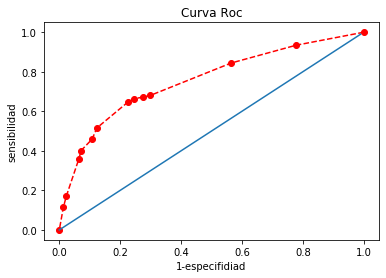

In [354]:
%matplotlib inline
plt.plot(especifities_1, sensibilities, marker ="o", linestyle ="--", color ="r")
x=[i*0.01 for i in range (100)]
y=[i*0.01 for i in range (100)]
plt.plot(x,y)
plt.xlabel("1-especifidiad")
plt.ylabel("sensibilidad")
plt.title("Curva Roc")

In [360]:
from sklearn import metrics
from GGplot import *

ModuleNotFoundError: No module named 'GGplot'